# **Notebook 2: EDA**

## Objectives

* The next step in our data analysis process is Exploratory Data Analysis (EDA). This is a crucial step where you'll discover patterns, spot anomalies, test hypothesis, and check assumptions with the help of summary statistics and graphical representations.

* In the context of our problem, we are mainly interested in understanding the relationship between house attributes and the SalePrice. We'll therefore look for correlations between the variables.

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/housing'

# Section 1

We start by plotting a correlation matrix. This will give us a visual overview of how the variables are related to each other.

First, we load the cleaned data.

In [4]:
import pandas as pd

records_df = pd.read_csv('outputs/datasets/cleaned/house_prices_records_cleaned.csv')
inherited_df = pd.read_csv('outputs/datasets/cleaned/inherited_houses_cleaned.csv')

---

In [7]:
records_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854,3,No,706,GLQ,150,548,RFn,2003,...,8450,65,196,61,5,7,856,2003,2003,208500
1,1262,0,3,Gd,978,ALQ,284,460,RFn,1976,...,9600,80,0,0,8,6,1262,1976,1976,181500
2,920,866,3,Mn,486,GLQ,434,608,RFn,2001,...,11250,68,162,42,5,7,920,2001,2002,223500
3,961,0,3,No,216,ALQ,540,642,Unf,1998,...,9550,60,0,35,5,7,756,1915,1970,140000
4,1145,0,4,Av,655,GLQ,490,836,RFn,2000,...,14260,84,350,84,5,8,1145,2000,2000,250000


Here we explore the data. We are interested to get more familiar with the dataset, check variable distribution, missing levels (in our case there are none since we handled missing data in the earlier step) and what these variables mean in a business context.

In [6]:
print(records_df.dtypes)

1stFlrSF         int64
2ndFlrSF         int64
BedroomAbvGr     int64
BsmtExposure    object
BsmtFinSF1       int64
BsmtFinType1    object
BsmtUnfSF        int64
GarageArea       int64
GarageFinish    object
GarageYrBlt      int64
GrLivArea        int64
KitchenQual     object
LotArea          int64
LotFrontage      int64
MasVnrArea       int64
OpenPorchSF      int64
OverallCond      int64
OverallQual      int64
TotalBsmtSF      int64
YearBuilt        int64
YearRemodAdd     int64
SalePrice        int64
dtype: object


In [8]:
from pandas_profiling import ProfileReport

profile = ProfileReport(records_df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We use the seaborn library to plot a correlation heatmap.
This code will plot a heatmap of the correlations between all the variables in the dataset. The annot=True parameter will display the correlation coefficients on the plot, and fmt='.2f' will format these coefficients to 2 decimal places. The cmap='coolwarm' parameter sets the color map of the heatmap to 'coolwarm'.

The correlation coefficient ranges from -1 to 1. If value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

In [11]:
%matplotlib inline

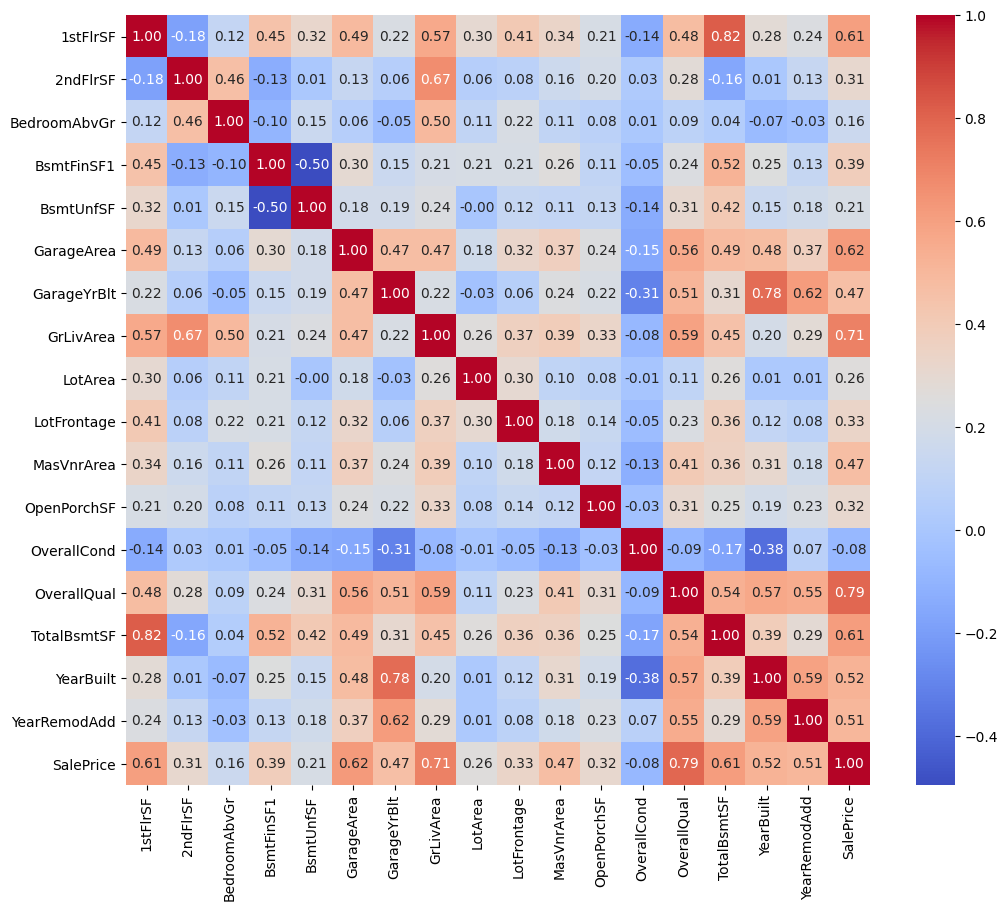

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(records_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

From the heatmap we can see e.g. that OverallQuality and SalePrice are quite highly correlated.

# Numerical Data Analysis

Next we describe the numerical data and visualize the distributions. The output table summarizes the central tendency, dispersion and shape of the dataset's distribution for each numerical variable.

In [14]:
records_df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,327.994521,2.878082,443.639726,567.240411,472.980137,1978.589041,1515.463699,10516.828082,69.863699,103.117123,46.660274,5.575342,6.099315,1057.429452,1971.267808,1984.865753,180921.195890
std,386.587738,433.576171,0.792485,456.098091,441.866955,213.804841,23.997022,525.480383,9981.264932,22.027677,180.731373,66.256028,1.112799,1.382997,438.705324,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,334.500000,1962.000000,1129.500000,7553.500000,60.000000,0.000000,0.000000,5.000000,5.000000,795.750000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,1973.000000,1994.000000,163000.000000
75%,1391.250000,714.500000,3.000000,712.250000,808.000000,576.000000,2001.000000,1776.750000,11601.500000,79.000000,164.250000,68.000000,6.000000,7.000000,1298.250000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,2010.000000,2010.000000,755000.000000


Next, we visualize the distributions of the numerical variables

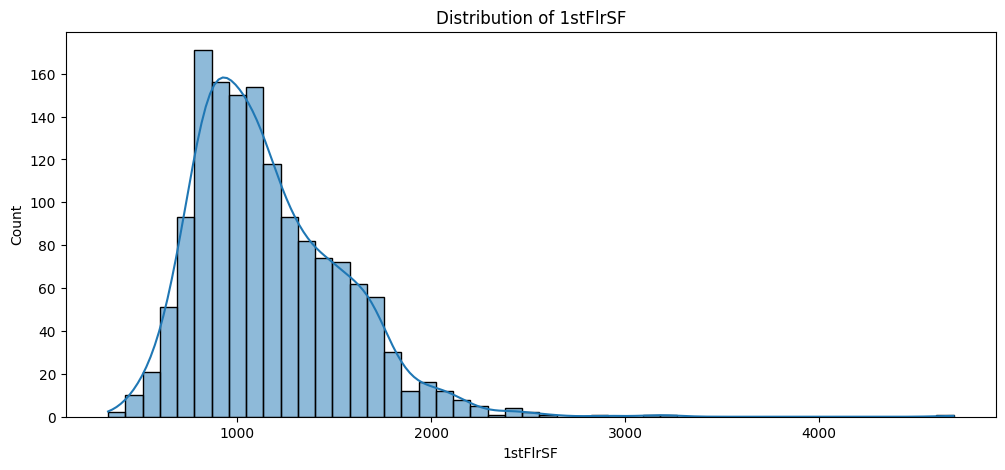

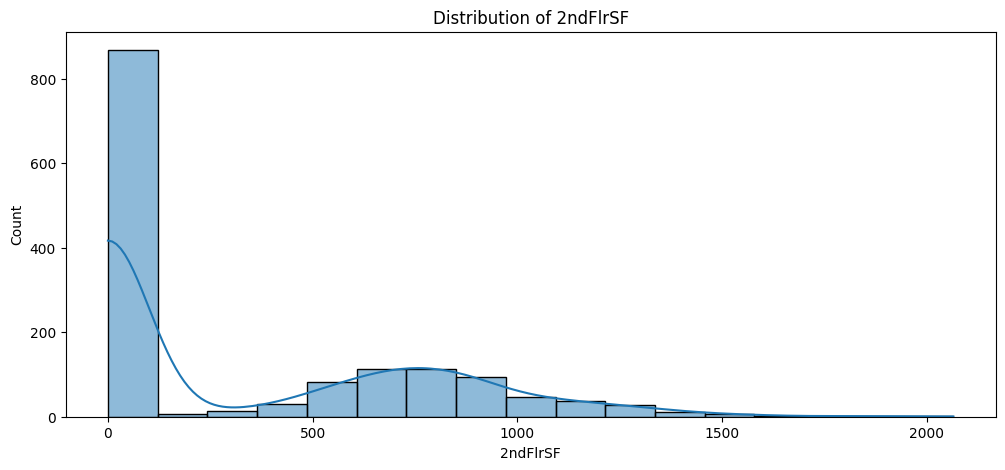

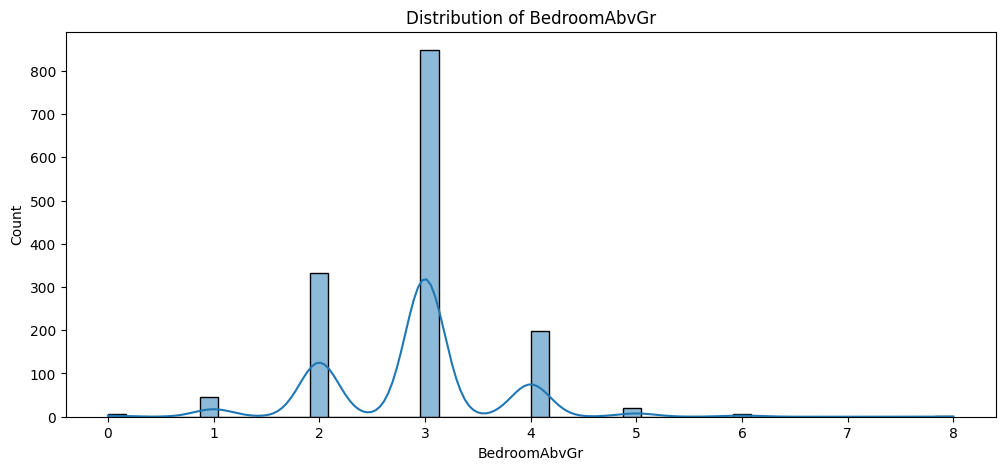

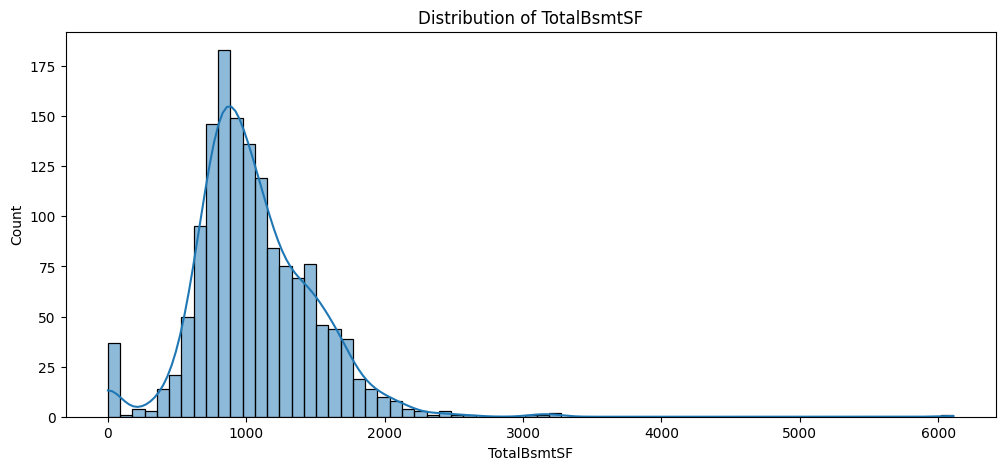

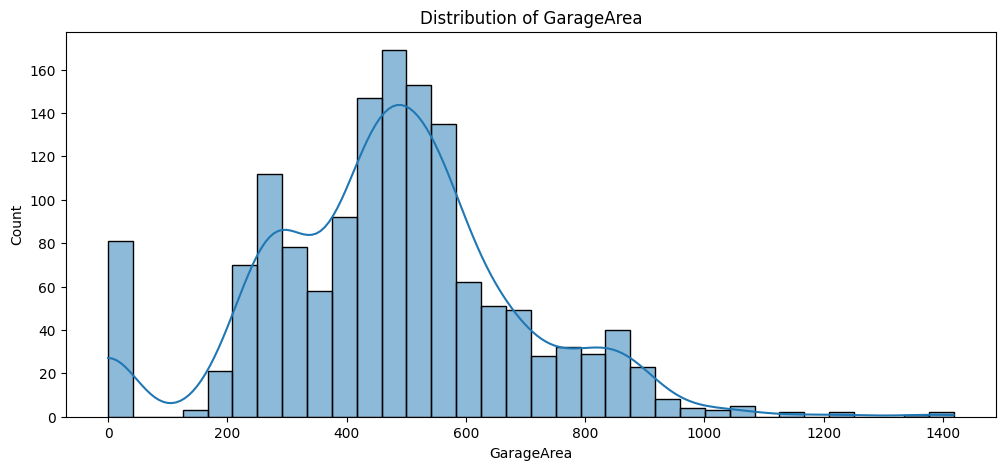

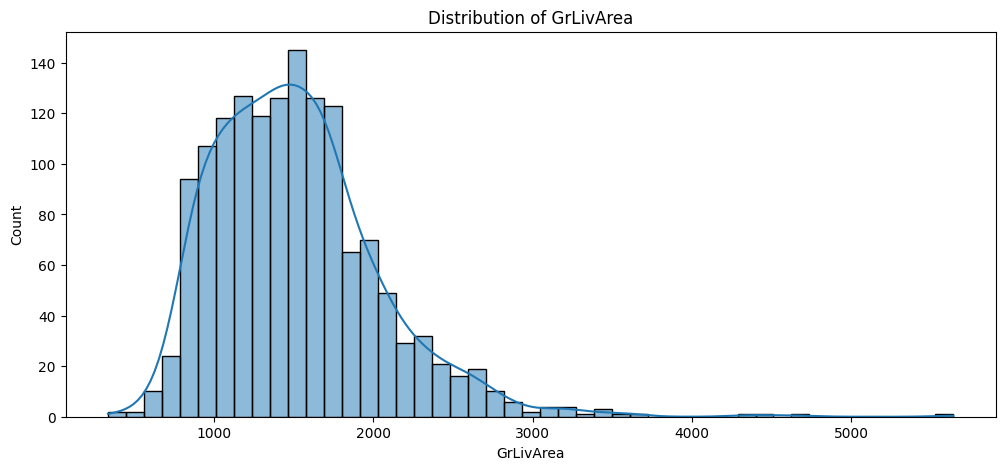

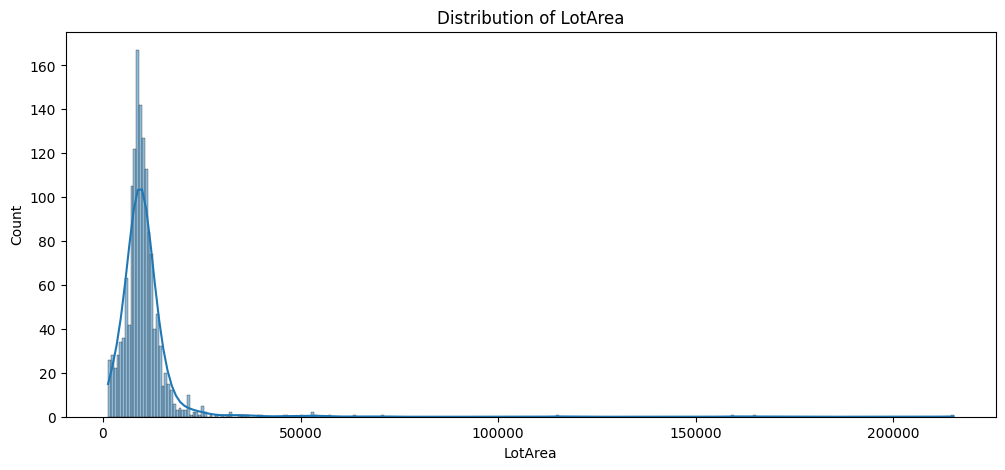

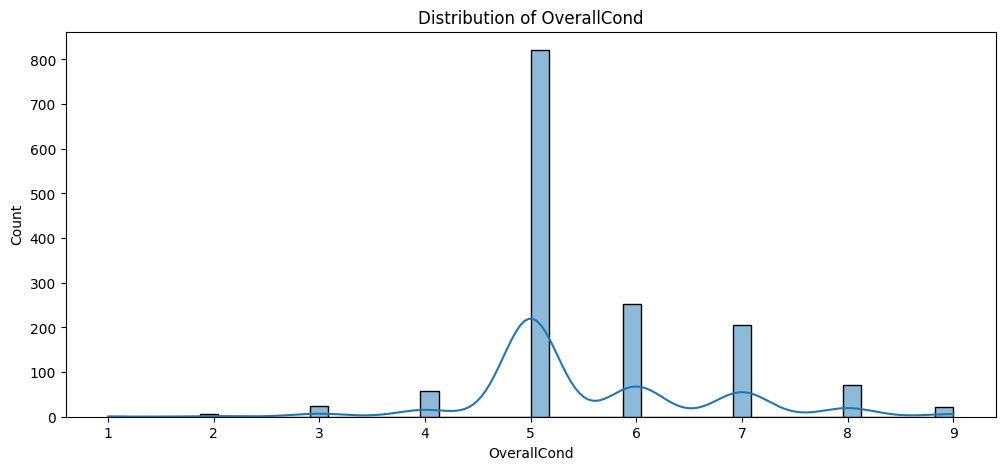

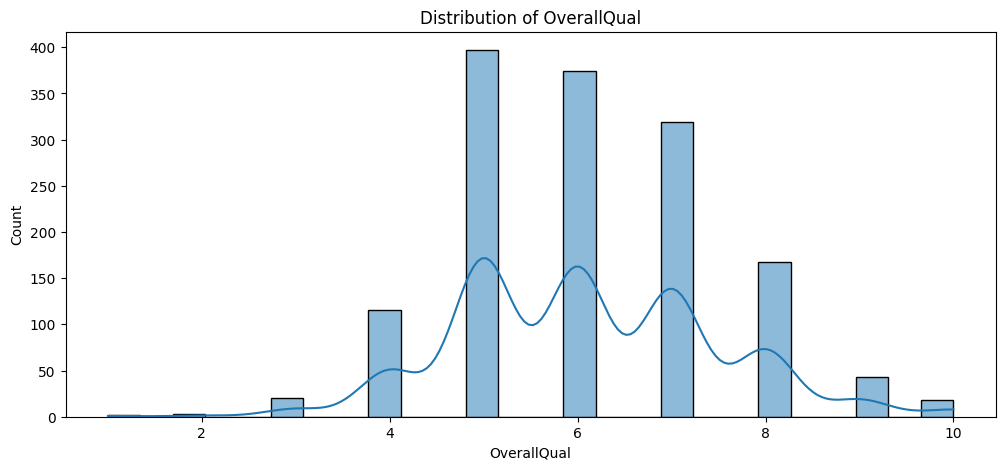

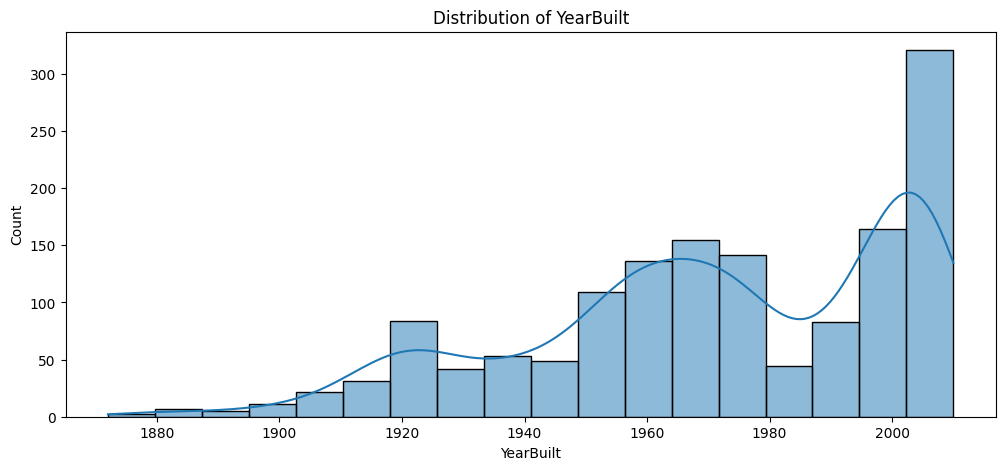

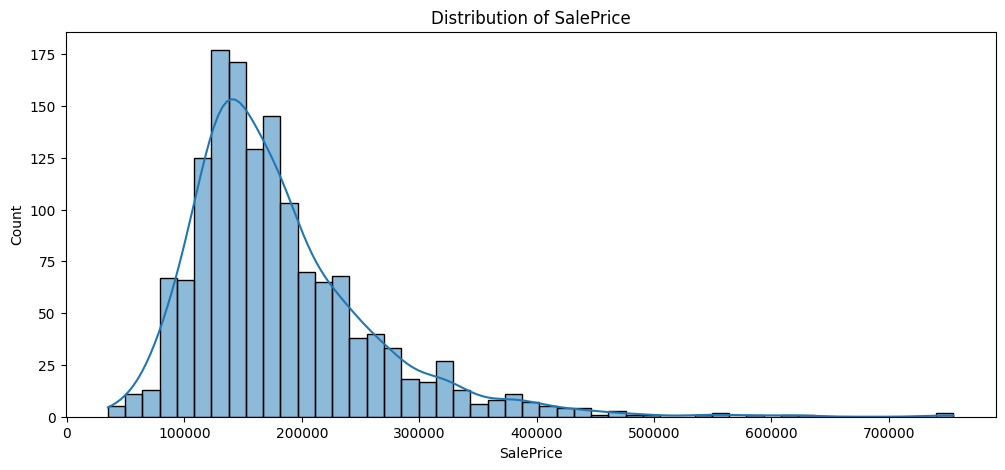

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables I'm interested in
num_vars = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'LotArea', 'OverallCond', 'OverallQual', 'YearBuilt', 'SalePrice']

# Loop through the list and plot a histogram for each variable
for var in num_vars:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of " + var)
    sns.histplot(records_df[var], kde=True)
    plt.show()


Section 2 content

In [16]:
correlations = records_df.corr()['SalePrice'].sort_values(key=abs, ascending=False)

print(correlations.head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
Name: SalePrice, dtype: float64


Above are the variables that have the highest correlation with 'SalePrice', below we are creating scatter plots of these variables against 'SalePrice' to visualize their relationships.

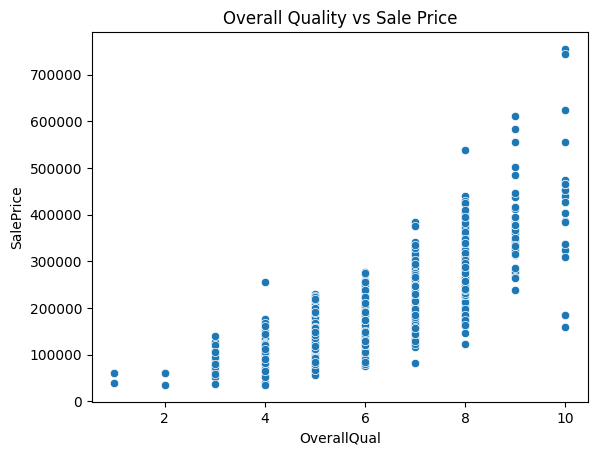

In [17]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=records_df)
plt.title("Overall Quality vs Sale Price")
plt.show()

Checking for Multicollinearity: After the scatter plots, check for multicollinearity among the variables with high correlation with 'SalePrice'. You can create a correlation matrix heatmap for these variables.

The heatmap will help you see if there are any pairs of these variables that are highly correlated with each other.

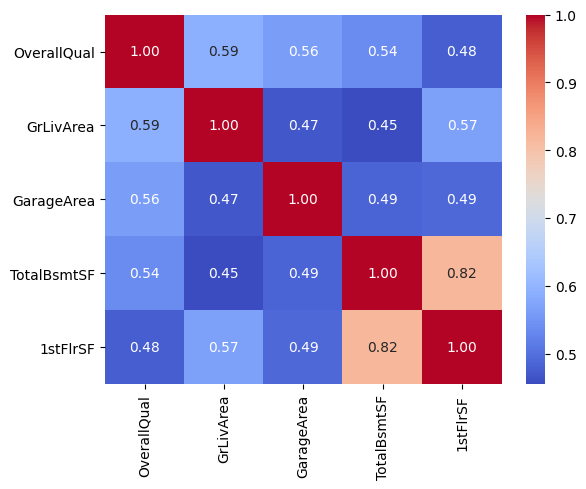

In [18]:
# List of top correlated variables
top_corr_vars = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

# Create correlation matrix for these variables
corr_matrix = records_df[top_corr_vars].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Given that 'TotalBsmtSF' (Total square feet of basement area) and '1stFlrSF' (First Floor square feet) are highly correlated, it suggests that they provide similar information. This is to be expected as houses with larger basements generally tend to have larger first floors. Using both of these variables in the analysis may not provide additional value and could potentially lead to multicollinearity issues in your model.

For this reason, I decide to combine them as I still retain the information from both variables without having the multicollinearity issue.

In [20]:
# Create new feature
records_df['TotalSF'] = records_df['TotalBsmtSF'] + records_df['1stFlrSF']

# Drop original features
records_df = records_df.drop(['TotalBsmtSF', '1stFlrSF'], axis=1)


Examine the distribution of 'TotalSF' and its relationship with 'SalePrice' using a histogram:

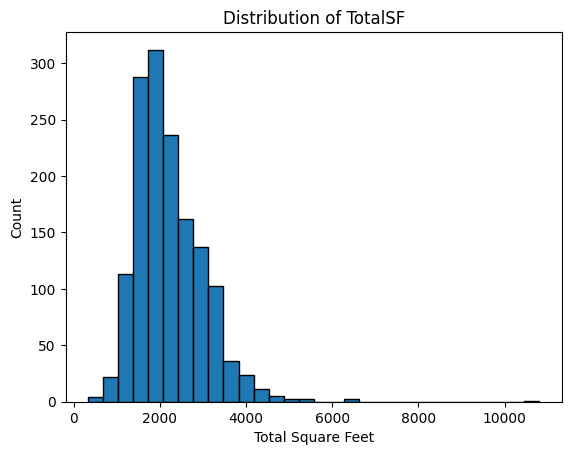

In [21]:
import matplotlib.pyplot as plt
plt.hist(records_df['TotalSF'], bins=30, edgecolor='black')
plt.title('Distribution of TotalSF')
plt.xlabel('Total Square Feet')
plt.ylabel('Count')
plt.show()

And the same with a scatterplot:

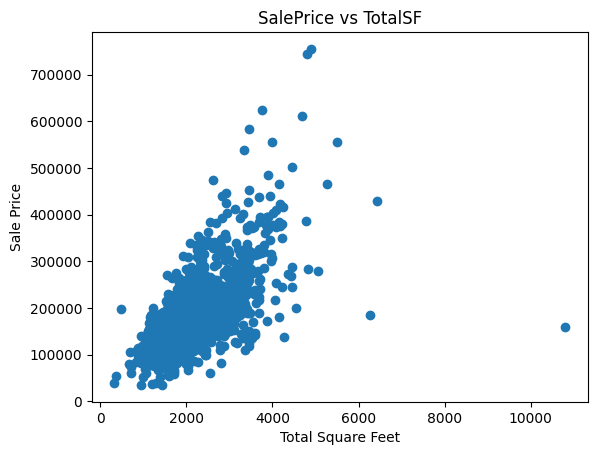

In [22]:
plt.scatter(records_df['TotalSF'], records_df['SalePrice'])
plt.title('SalePrice vs TotalSF')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.show()


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
